## Imports and Setup

In [21]:
# Importation of Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importation of Sklearn modules
import sklearn.model_selection as sk
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, accuracy_score

#Importation of models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier



In [4]:
#Importation of the dataset
url=pd.read_csv('Phishing_Legitimate_full.csv')

## Dataset Analysis

In [5]:
#Display the first elements of our dataset
url.head(10)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
5,6,3,1,1,42,1,0,0,0,0,...,1,1,0,1,1,1,1,-1,1,1
6,7,2,0,5,60,0,0,0,0,0,...,0,0,0,1,0,1,1,-1,-1,1
7,8,1,0,3,30,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
8,9,8,7,2,76,1,1,0,0,0,...,0,0,0,-1,-1,1,1,1,-1,1
9,10,2,0,2,46,0,0,0,0,0,...,0,0,0,1,1,1,1,-1,-1,1


In [6]:
url.shape

(10000, 50)

Our dataset contains 50 variables and 10 000 samples.

In [7]:
url.info

<bound method DataFrame.info of          id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0         1        3               1          5         72        0   
1         2        3               1          3        144        0   
2         3        3               1          2         58        0   
3         4        3               1          6         79        1   
4         5        3               0          4         46        0   
...     ...      ...             ...        ...        ...      ...   
9995   9996        3               1          1         50        0   
9996   9997        2               1          4         59        1   
9997   9998        2               1          4         57        0   
9998   9999        3               1          1         49        0   
9999  10000        3               1          2         52        3   

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  \
0                     0         0            

In [8]:
# Check if any missing values
url.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


The dataset is clean and contains no missing values.

In [10]:
#Displaying the description of each columns of the dataset
url.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


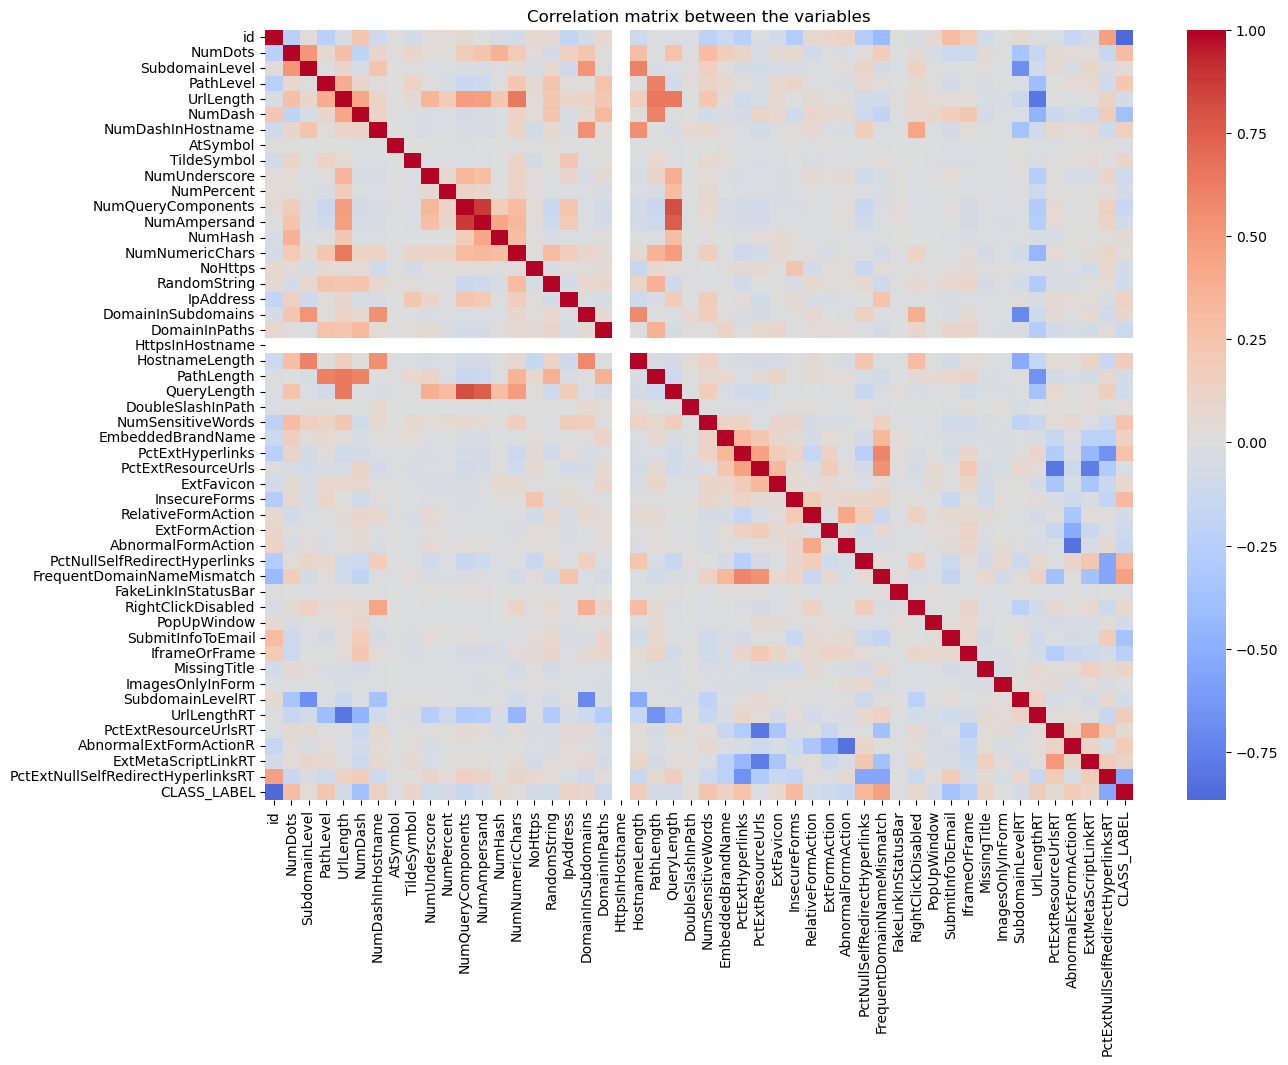

In [ ]:
#Generation of the correlation matrix
plt.figure(figsize=(14,10))
sns.heatmap(url.corr(), cmap="coolwarm", center=0)
plt.title("Correlation matrix between the variables")
plt.show()

## Implementation of the necessary pre-processing


In [13]:
#Dropping ID column as it provides no predictive power and false the results
X=url.drop(["CLASS_LABEL","id"],axis=1)
y=url["CLASS_LABEL"].round()

In [14]:
#Splitting the data into test and train
X_train,X_test,y_train,y_test=sk.train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

In [15]:
#Scaling features for distance-based algorithms (Logisitic Regression/ PCA)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Dimensionality Reduction

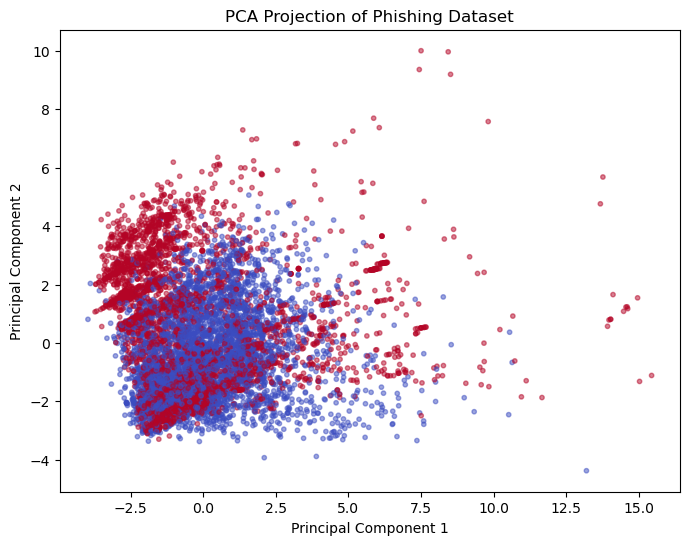

In [16]:
#Applying a PCA (Principal component analysis)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.5, s=10)
plt.title('PCA Projection of Phishing Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Modeling & Hyperparameter Tuning

### Logistic Regression

In [17]:
#Application of the logistic regression
model_reg = LogisticRegression(max_iter=1000, random_state=42)
model_reg.fit(X_train_scaled, y_train)

y_pred_lr = model_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.952


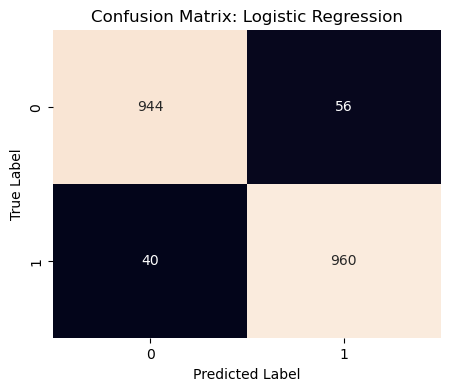

In [18]:
#Display the confusion matric of Logistic Regression
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Decision Tree Classifier

In [19]:
#Creation of the decision tree classifier model
model_DT = DecisionTreeClassifier(criterion="gini",max_depth=10,random_state=42)
model_DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [20]:
y_pred_DT=model_DT.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred_DT))

Accuracy : 0.965


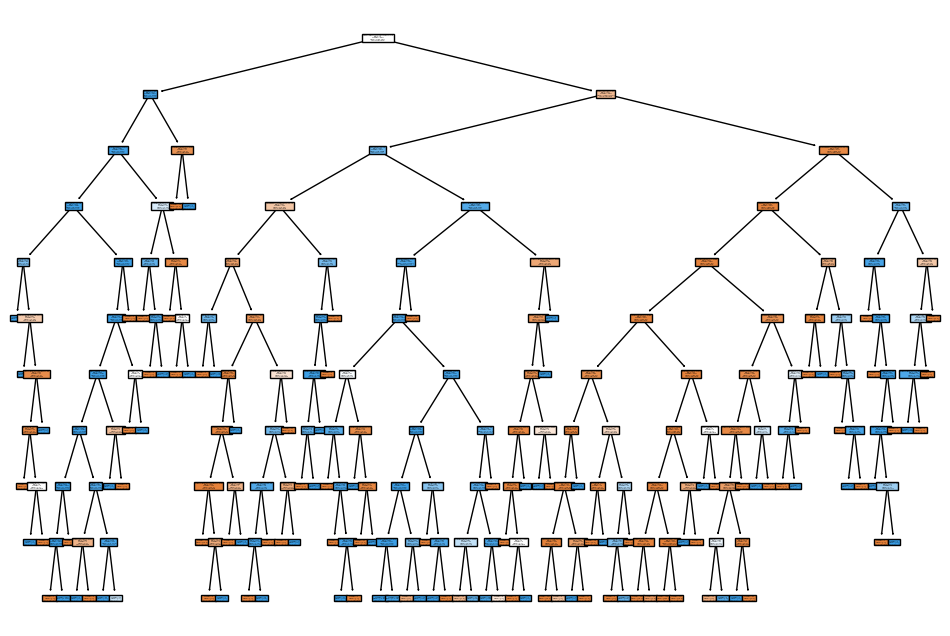

In [22]:
#Display the tree of the Decision Tree Classifier model
plt.figure(figsize=(12, 8))
tree.plot_tree(model_DT, filled=True, feature_names=X.columns, class_names=["Legitimate", "Phishing"])
plt.show()

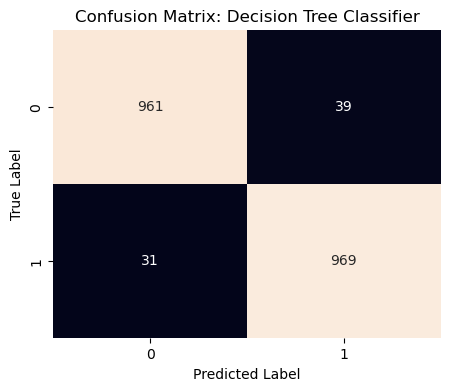

In [23]:
#Plotting the confusion matrix of the Decision tree classifier
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_DT), annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix: Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### GridSearch

In [24]:
tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10]
}

In [25]:
grid_search_tree = GridSearchCV(
    estimator=model_DT,
    param_grid=tree_param_grid,
    scoring='f1',
    cv=2,
    verbose=1,
    refit=True
)

In [26]:
grid_search_tree.fit(X_train, y_train) 

Fitting 2 folds for each of 30 candidates, totalling 60 fits


GridSearchCV(cv=2,
             estimator=DecisionTreeClassifier(max_depth=10, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

In [27]:
#Displaying the results obtained
bestTree_GdT=grid_search_tree.best_estimator_
y_pred_GdT=bestTree_GdT.predict(X_test)
print(classification_report(y_test, y_pred_GdT))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1000
           1       0.96      0.97      0.97      1000

    accuracy                           0.96      2000
   macro avg       0.97      0.96      0.96      2000
weighted avg       0.97      0.96      0.96      2000



In [28]:
#Displaying the best parameters
best_model_GdT=grid_search_tree.best_estimator_
print(best_model_GdT)
print(best_model_GdT.score(X_test, y_test))

DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
0.965


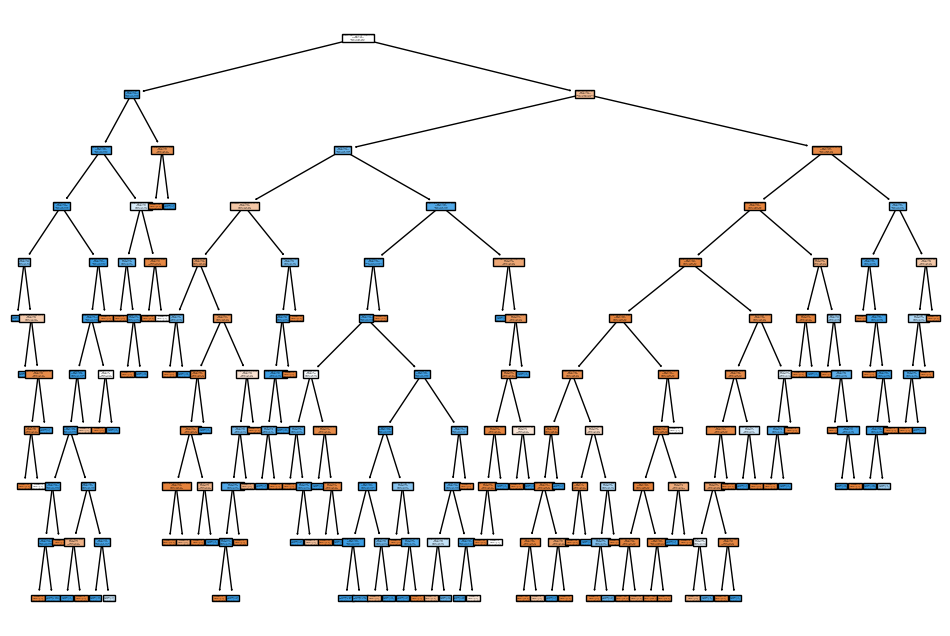

In [29]:
#Displaying the tree of Decision tree classifier with GridSearch
plt.figure(figsize=(12, 8))
tree.plot_tree(best_model_GdT, filled=True, feature_names=X.columns, class_names=["Legitimate", "Phishing"])
plt.show()

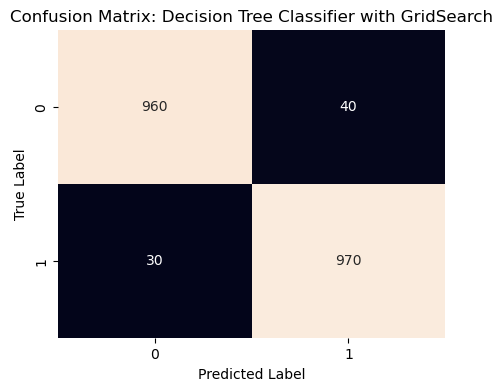

In [30]:
#Confusion matrix obtained
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_GdT), annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix: Decision Tree Classifier with GridSearch')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Ensemble and Advanced Models

### Random Forest Classifier

In [31]:
#Creating the Random Forest Classifier model
model_RFC=RandomForestClassifier(max_depth=8, random_state=0)
model_RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, random_state=0)

In [32]:
#Predicting the model
y_pred_RFC=model_RFC.predict(X_test)

In [33]:
#Displaying the results obtained
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1000
           1       0.98      0.97      0.98      1000

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [34]:
print("Accuracy :", accuracy_score(y_test, y_pred_RFC))

Accuracy : 0.9755


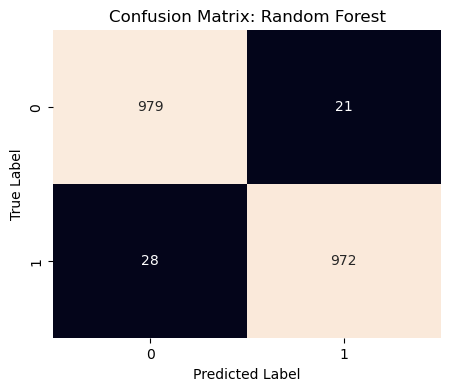

In [35]:
#Displaying the RFC matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_RFC), annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Gradient Boosting

In [37]:
#Creation of the Gradient boosting model
model_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model_GB.fit(X_train, y_train)
y_pred_GB = model_GB.predict(X_test)

In [38]:
#Displaying the results obtained
print(classification_report(y_test, y_pred_GB))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1000
           1       0.98      0.98      0.98      1000

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [39]:
print("Accuracy :", accuracy_score(y_test, y_pred_GB))

Accuracy : 0.979


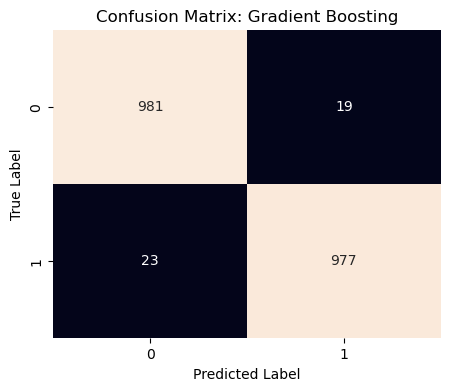

In [40]:
#Displaying the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_GB), annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix: Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Comparison and Conclusion

In [41]:
#Importing the results on 'models'
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier' ,'Optimized Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_DT),
        accuracy_score(y_test, y_pred_GdT),
        accuracy_score(y_test, y_pred_RFC),
        accuracy_score(y_test, y_pred_GB)
    ]
})

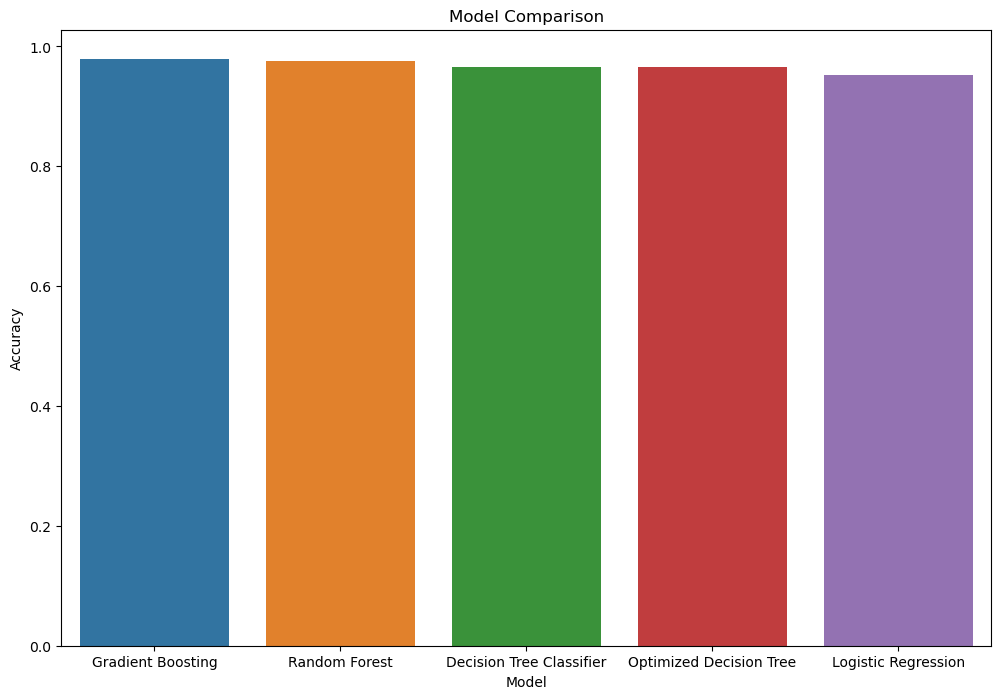

In [50]:
#Plotting a barplot to compare all the models
plt.figure(figsize=(12,8))
sns.barplot(y='Accuracy', x='Model', data=models.sort_values(by='Accuracy', ascending=False)) #sorting the values to make the reading easier
plt.title('Model Comparison')
plt.show()

In conclusion, the barplot shows that Gradient Boosting has a higher accuracy compared to other models (0.979), even though the Random Forest Classifier is close (0.9755). However, our priority is to minimize False Negatives. Indeed, classifying a phishing URL as legitimate is the most risky scenario. In this regard, the Gradient Boosting model still achieves the best score compared to others.